In [1]:
import pandas as pd

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [177]:
def Zarcfun(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + Qx*(np.pi*2*freq*1j)**px)
    return out

def ZarcElecfun(Rx, Qx, Pei, Pef, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + Qx*(1j)**Pei*(np.pi*2*freq)**Pef)
    return out

def RplusCPEfun(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = Rx + 1./(Qx*(np.pi*2*freq*1j)**px)
    return out

def Zseries(Rinf, Rh, Qh, Ph, Rm, Qm, Pm, Rl, Ql, Pl, Re, Qe, Pei, Pef, freq):
    out = Rinf + Zarcfun(Rh, Qh, Ph, freq) + Zarcfun(Rm, Qm, Pm, freq) + Zarcfun(Rl, Ql, Pl, freq) \
               + ZarcElecfun(Re, Qe, Pei, Pef, freq)
    return out

In [178]:
pred = Zseries(Rinf, Rh, Qh, Ph, Rm, Qm, Pm, Rl, Ql, Pl, Re, Qe, Pei, Pef, frequency)

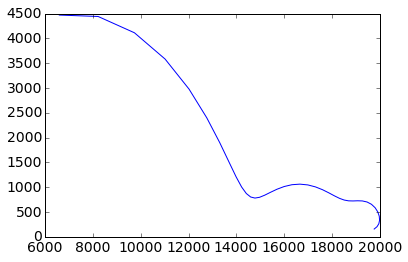

In [179]:
plt.plot(pred.real, -pred.imag)

In [180]:
pred.imag

array([-4470.52370907, -4442.11190315, -4113.67085745, -3583.40747292,
       -2977.74093141, -2397.6297986 , -1899.8251632 , -1504.36788004,
       -1209.49481038, -1003.66416067,  -872.59976731,  -802.50899743,
        -781.00976531,  -796.88052848,  -839.33875132,  -897.33936406,
        -959.30866366, -1013.64726633, -1050.09490429, -1061.6042915 ,
       -1045.93463365, -1006.12706918,  -949.54270048,  -885.8807701 ,
        -824.9805748 ,  -775.01853331,  -741.22933   ,  -724.93260677,
        -722.71384604,  -726.14686903,  -723.13146741,  -701.74674889,
        -655.4808309 ,  -586.29355502,  -502.94334528,  -416.19505292,
        -334.70518304,  -263.40373954,  -204.0729073 ,  -156.33982157])

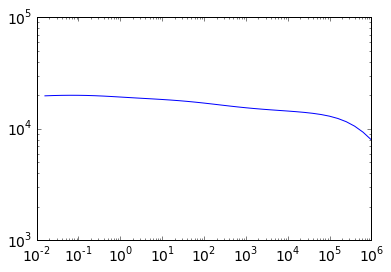

In [181]:
plt.loglog(frequency, abs(pred))

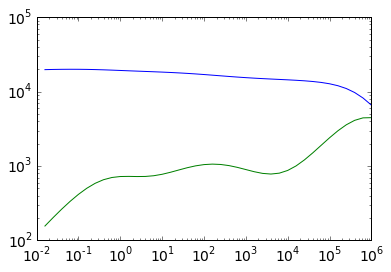

In [182]:
plt.loglog(frequency, pred.real)
plt.loglog(frequency, -pred.imag)

In [183]:
pred.imag

array([-4470.52370907, -4442.11190315, -4113.67085745, -3583.40747292,
       -2977.74093141, -2397.6297986 , -1899.8251632 , -1504.36788004,
       -1209.49481038, -1003.66416067,  -872.59976731,  -802.50899743,
        -781.00976531,  -796.88052848,  -839.33875132,  -897.33936406,
        -959.30866366, -1013.64726633, -1050.09490429, -1061.6042915 ,
       -1045.93463365, -1006.12706918,  -949.54270048,  -885.8807701 ,
        -824.9805748 ,  -775.01853331,  -741.22933   ,  -724.93260677,
        -722.71384604,  -726.14686903,  -723.13146741,  -701.74674889,
        -655.4808309 ,  -586.29355502,  -502.94334528,  -416.19505292,
        -334.70518304,  -263.40373954,  -204.0729073 ,  -156.33982157])

In [184]:
phase = np.arctan2(obs.real, -obs.imag)*180/np.pi
# phase = np.arctan2(pred.real, pred.imag)*180/np.pi

In [185]:
phase

array([ 55.28325777,  61.42323617,  67.17599015,  72.11186163,
        76.13218437,  79.34189389,  81.73080053,  83.52541566,
        84.80263861,  85.73305462,  86.34765745,  86.71974034,
        86.89589852,  86.92462374,  86.8392619 ,  86.66290693,
        86.40937577,  86.16791684,  85.9699193 ,  85.94581333,
        86.08770377,  86.37544691,  86.73689978,  87.10203194,
        87.46598539,  87.51571914,  87.6311673 ,  87.859215  ,
        87.83519154,  87.82343884,  87.79434525,  87.87067688,
        88.10052069,  88.32497344,  88.59591176,  88.86050625,
        89.02885722,  89.16562173,  89.29757344,  89.36628252])

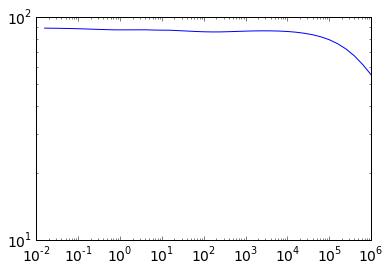

In [186]:
phase
plt.loglog(frequency,phase)
# plt.ylim(0.1, 200)

In [53]:
# pathforPK = "../data/nt01213a.z"
pathforPK = "I:\Labwork\Phys Props\Footprints\HighlandValley\HVC 2014-10Grenon\BC13876B 2014-10-28.z"
# pathfordata = "../data/Kimberlite-2015-07-17.xls"
# pathfordata = "I:\Labwork\Phys Props\Footprints\HighlandValley\HVC 2014-10Grenon\HVC 2014-10-27simplified.csv"
pathfordata = "I:\Labwork\Phys Props\Footprints\HighlandValley\HVC 2014-10Grenon\HVC 2014-10-27simplified.csv"
temp = np.loadtxt(pathforPK, skiprows=11, delimiter=",")
frequency = temp[:,0].copy()
data = pd.read_csv(pathfordata)
data_active = data.loc[data['file'] == 'BC13876B 2014-10-28.z']
# data_active = data.loc[(data.notnull()['Rinf']==True)][["file", "Rinf","Ro","Rh","Qh","Ph", "Fh","pRh", "pQh","Rm","Qm","Pm", "pRm", "pQm","Rl","Ql","Pl", "Fl", "pRl", "pQl","Re","Qe","Pe-f","Pe-i"]]

In [54]:
data_active

,file,Rinf,Rh,Ph,Fh,Rm,Pm,Fm,Rl,Pl,Fl,Re,Qe,Pe-f,Pe-i,Linf,Fhigh,Flow,date/time
17,BC13876B 2014-10-28.z,32,14300,0.71,838000,4590,0.521,167,1840,0.667,0.593,10000000000,0.00306,0.433,-2,0.000001,1000000,0.0159,2014-11-03/10:11:15


In [55]:
labid = 'BC13876B 2014-10-28.z'

In [59]:
qfun = lambda r, f, p: 1./(r*(np.pi*2*f)**p)
f0peak = lambda R, Q, P: (R*Q)**(-1./P)/np.pi/2.
taupeak = lambda R, Q, P: (R*Q)**(1./P)
rhoinf = lambda rhom, rhol, rho0: 1./(1./rho0+1./rhom+1./rhol)
charg = lambda rhoinf, rho0: (rho0-rhoinf) / rhoinf

In [70]:
# R0 = data_active[data['file'] == labid]['Ro'].values[0]

Rinf = data_active[data['file'] == labid]['Rinf'].values[0]
Rh = data_active[data['file'] == labid]['Rh'].values[0]
# Qh = data_active[data['file'] == labid]['Qh'].values[0]
# pRh = data_active[data['file'] == labid]['pRh'].values[0]
# pQh = data_active[data['file'] == labid]['pQh'].values[0]
Ph = data_active[data['file'] == labid]['Ph'].values[0]
Fh = data_active[data['file'] == labid]['Fh'].values[0]
Qh = qfun(Rh, Fh, Ph)
Pm = data_active[data['file'] == labid]['Pm'].values[0]
Fm = data_active[data['file'] == labid]['Fm'].values[0]
Rm = data_active[data['file'] == labid]['Rm'].values[0]
Qm = qfun(Rm, Fm, Pm)

Rl = data_active[data['file'] == labid]['Rl'].values[0]
Pl = data_active[data['file'] == labid]['Pl'].values[0]
Fl = data_active[data['file'] == labid]['Fl'].values[0]
Ql = qfun(Rl, Fl, Pl)

# Ql = data_active[data['file'] == labid]['Ql'].values[0]
# pRl = data_active[data['file'] == labid]['pRl'].values[0]
# pQl = data_active[data['file'] == labid]['pQl'].values[0]

Re = data_active[data['file'] == labid]['Re'].values[0]
Qe = data_active[data['file'] == labid]['Qe'].values[0]
Pef = data_active[data['file'] == labid]['Pe-f'].values[0]
Pei = data_active[data['file'] == labid]['Pe-i'].values[0]

R0 = Rinf + Rh + Rm + Rl

C:\progra~1\Anaconda3\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [74]:
# print(R0)
# print(Rinf)
# print(Rh)
# print(Rm)
# print(Rl)
# print(Qh)
# print(Ql)
# print(Qm)

In [75]:
# R0 = data_active[data['0LabID (PCG)'] == labid]['Ro'].values[0]
# Rinf = data_active[data['0LabID (PCG)'] == labid]['Rinf'].values[0]
# Rh = data_active[data['0LabID (PCG)'] == labid]['Rh'].values[0]
# Qh = data_active[data['0LabID (PCG)'] == labid]['Qh'].values[0]
# pRh = data_active[data['0LabID (PCG)'] == labid]['pRh'].values[0]
# pQh = data_active[data['0LabID (PCG)'] == labid]['pQh'].values[0]
# Ph = data_active[data['0LabID (PCG)'] == labid]['Ph'].values[0]
# Fh = data_active[data['0LabID (PCG)'] == labid]['Fh'].values[0]
# Rl = data_active[data['0LabID (PCG)'] == labid]['Rl'].values[0]
# Ql = data_active[data['0LabID (PCG)'] == labid]['Ql'].values[0]
# pRl = data_active[data['0LabID (PCG)'] == labid]['pRl'].values[0]
# pQl = data_active[data['0LabID (PCG)'] == labid]['pQl'].values[0]
# Pl = data_active[data['0LabID (PCG)'] == labid]['Pl'].values[0]
# Re = data_active[data['0LabID (PCG)'] == labid]['Re'].values[0]
# Qe = data_active[data['0LabID (PCG)'] == labid]['Qe'].values[0]
# Pef = data_active[data['0LabID (PCG)'] == labid]['Pe-f'].values[0]
# Pei = data_active[data['0LabID (PCG)'] == labid]['Pe-i'].values[0]

In [78]:
obs = temp[:,4]+1j*temp[:,5]

In [79]:
def fitfun(R0, Rh, Qh, Ph, Rl, Ql, Pl, Re, Qe, Pef, Pei,plottype="realimag"):
    Zh = CPEfunSeries(Rh, Qh, Ph, frequency)
    Zl = CPEfunSeries(Rl, Ql, Pl, frequency)
    Ze = CPEfunElec(Re, Qe, Pef, Pei, frequency)
    pred = 1./(1./R0+1./Zh+1./Zl)+Ze

    fig = plt.figure(figsize = (14, 4))
#     fig.patch.set_facecolor('black')
    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
    ax.patch.set_facecolor('black')
    ax1.patch.set_facecolor('black')
    if plottype=="realimag":
        ax.loglog(frequency, obs.real, 'lime', lw=3, marker=".", ms=8)
        ax1.loglog(frequency, abs(obs.imag), 'lime', lw=3, marker=".", ms=8)
        ax.loglog(frequency, pred.real, 'deepskyblue', lw=2)
        ax1.loglog(frequency, abs(pred.imag), 'deepskyblue', lw=2)
        ax.set_ylabel("Real (Ohm)")
        ax.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Imaginary (Ohm)")
        ax1.set_xlabel("Frequency (Hz)")
        
        ax.invert_xaxis()
        ax1.invert_xaxis()
        ax.set_ylim(obs.real.min(), obs.real.max())
        ax1.set_ylim(abs(obs.imag).min(), abs(obs.imag).max())        
    elif plottype=="ampphase":
        amp = np.sqrt(obs.real**2+obs.imag**2)
        phase = np.arctan2(obs.real, obs.imag)
        ax.loglog(frequency, amp, 'lime', lw=3, marker=".", ms=8)
        ax1.loglog(frequency, phase, 'lime', lw=3, marker=".", ms=8)
        ax.loglog(frequency, abs(pred), 'deepskyblue', lw=2)
        ax1.loglog(frequency, np.arctan2(pred.real, pred.imag), 'deepskyblue', lw=2)
        ax.invert_xaxis()
        ax1.invert_xaxis()
        ax.set_ylim(amp.min(), amp.max())
        ax1.set_ylim(phase.min(), phase.max())       
        ax.set_ylabel("Amplitude (Ohm)")
        ax.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Phase (rad)")
        ax1.set_xlabel("Frequency (Hz)")
        
    elif plottype=="zarc":        
        amp = np.sqrt(obs.real**2+obs.imag**2)
        amp_pred = np.sqrt(pred.real**2+pred.imag**2)
        ax.plot(obs.real, -obs.imag, 'lime', lw=3, marker=".", ms=8)
        ax.plot(pred.real, -pred.imag, 'deepskyblue', lw=2)
        ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp))/diff(np.log10(frequency)), 'lime', lw=3, marker=".", ms=8)
        ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp_pred))/diff(np.log10(frequency)), 'deepskyblue', lw=2)
        ax.set_xlim(obs.real.min(), obs.real.max())
        ax.set_ylim((-obs.imag).min(), (-obs.imag).max())
        ax.set_xlabel("Real (Ohm)")
        ax.set_ylabel("- Imaginary (Ohm)")
        ax1.set_xlabel("Frequency")
        ax1.set_ylabel("dlog(Amp)/dlog(Freq)")
        
        
    ax.grid(True)
    ax.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    ax1.grid(True)
    ax1.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
#     ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
#     ax1.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
    
    leg = ax1.legend(("Observed", "Predicted"), fontsize = 12, bbox_to_anchor = (1.4, 1))
    for text in leg.get_texts():
        plt.setp(text, color = 'k')
    plt.show()
    return True

In [80]:
from matplotlib.ticker import FormatStrFormatter
# ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

In [81]:
frequency[1:]*0.5+frequency[0:-1]*0.5

array([  8.15478650e+05,   5.14532250e+05,   3.24647900e+05,
         2.04838950e+05,   1.29244650e+05,   8.15478650e+04,
         5.14532250e+04,   3.24647900e+04,   2.04838950e+04,
         1.29244650e+04,   8.15478650e+03,   5.14532250e+03,
         3.24647900e+03,   2.04838950e+03,   1.29244650e+03,
         8.15478650e+02,   5.14532250e+02,   3.24647900e+02,
         2.04838950e+02,   1.29244650e+02,   8.15478650e+01,
         5.14532250e+01,   3.24647900e+01,   2.04838950e+01,
         1.29244650e+01,   8.15478500e+00,   5.14532000e+00,
         3.24648000e+00,   2.04839000e+00,   1.29244500e+00,
         8.15480000e-01,   5.14535000e-01,   3.24650000e-01,
         2.04840000e-01,   1.29245000e-01,   8.15500000e-02,
         5.14550000e-02,   3.24650000e-02,   2.04850000e-02])

In [82]:
# log Freq, d(log magnitude)/d(log Freq)

In [83]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'grid.color': 'white', 'grid.linewidth':1})

In [84]:
from IPython.html.widgets import interact, FloatText, FloatSlider, ToggleButtons

In [85]:
interact(fitfun, R0=FloatText(value=R0),\
    Rh=FloatSlider(min = 1, max = 10000., step = 100, value=pRh), 
    Qh=FloatText(value=pQh), 
    Ph=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Ph),
    Rl=FloatSlider(min = 1, max = 10000., step = 100, value=Rl), 
    Ql=FloatText(value=pQl), 
    Pl=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Pl),
    Re=FloatSlider(min = 1, max = 10000., step = 100, value=Re), 
    Qe=FloatText(value=Qe), 
    Pef=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Pef), 
    Pei=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Pei),
    plottype=ToggleButtons(options=['realimag','ampphase', 'zarc'])) 

NameError: name 'pRh' is not defined